In [71]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = pd.read_csv('household_power_consumption.txt', sep=";", header=None, na_values="?", skiprows=1)

data.columns = ['Date','Time','Global_active_power','Global_reactive_power','Voltage','Global_intensity',
                'Sub_metering_1','Sub_metering_2','Sub_metering_3']
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0


In [72]:
# Tipo de los atributos
data.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [73]:
# Medidas de centralidad para atributos numéricos
data.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


In [74]:
data.mode()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,1/1/2007,17:24:00,0.218,0.0,241.18,1.0,0.0,0.0,0.0
1,1/1/2008,17:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1/1/2009,17:26:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1/1/2010,17:27:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1/10/2007,17:28:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1435,9/8/2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1436,9/9/2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1437,9/9/2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1438,9/9/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


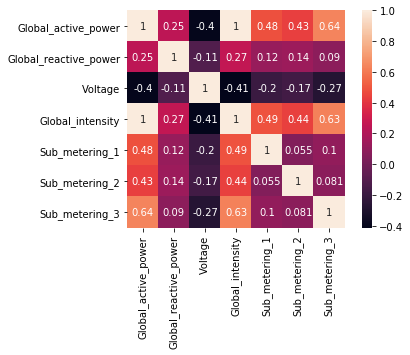

In [75]:
# Correlación entre los datos
sns.heatmap(data.corr(), square=True, annot=True)

{'whiskers': [<matplotlib.lines.Line2D at 0x7f7e3f3bb828>,
 'caps': [<matplotlib.lines.Line2D at 0x7f7e3f3bbf28>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f7e3f3bb518>],
 'medians': [<matplotlib.lines.Line2D at 0x7f7e3f3c75f8>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f7e3f3c7940>],
 'means': []}

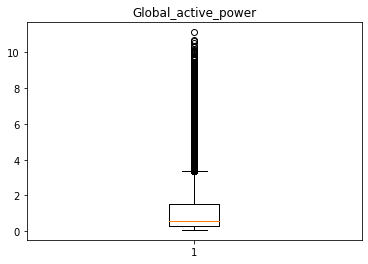

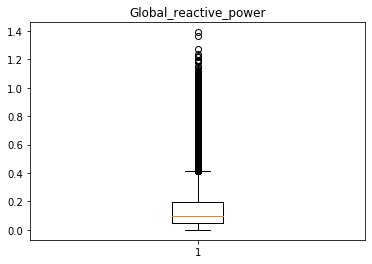

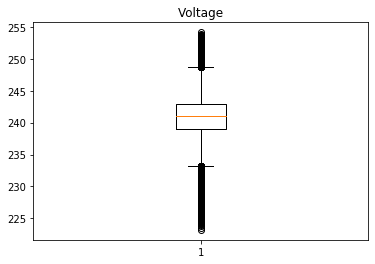

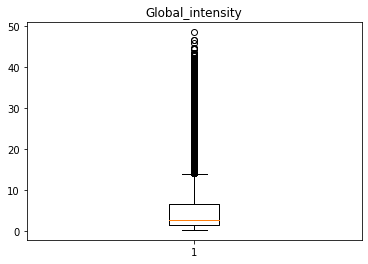

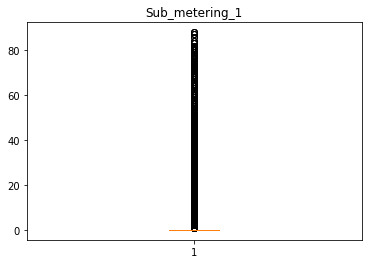

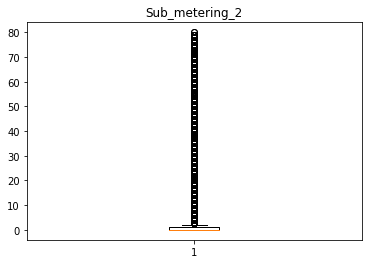

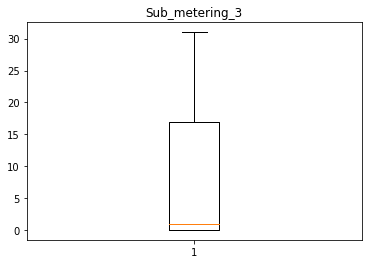

In [76]:
# Existen datos atípicos?

fig1, bp1 = plt.subplots()
bp1.set_title('Global_active_power')
bp1.boxplot(data['Global_active_power'].dropna())

fig1, bp1 = plt.subplots()
bp1.set_title('Global_reactive_power')
bp1.boxplot(data['Global_reactive_power'].dropna())

fig1, bp1 = plt.subplots()
bp1.set_title('Voltage')
bp1.boxplot(data['Voltage'].dropna())

fig1, bp1 = plt.subplots()
bp1.set_title('Global_intensity')
bp1.boxplot(data['Global_intensity'].dropna())

fig1, bp1 = plt.subplots()
bp1.set_title('Sub_metering_1')
bp1.boxplot(data['Sub_metering_1'].dropna())

fig1, bp1 = plt.subplots()
bp1.set_title('Sub_metering_2')
bp1.boxplot(data['Sub_metering_2'].dropna())

fig1, bp1 = plt.subplots()
bp1.set_title('Sub_metering_3')
bp1.boxplot(data['Sub_metering_3'].dropna())

In [77]:
# Registros faltantes por cada atributo
data.isnull().sum()

Date                         0
Time                         0
Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [78]:
# Cantidad máxima de atributos faltantes en un mismo registro
max(data.isnull().sum(axis=1))

7

In [79]:
# Cantidad de registros que tienen 7 atributos faltantes
data.isna().sum(axis=1)[data.isna().sum(axis=1) == 7].size

25979

### Plan para ajustar los datos
1. Eliminar los 25979 registros que tienen los 7 atributos faltantes.
2. Concatenar las columnas 'Date' y 'Time' en 'DateTime'
3. Transformar los atributo 'DateTime' al dtype datetime.
4. Eliminar los atributos 'Date' y 'Time'.
5. Extraer la información numérica de cada fecha y hora (año, mes, día de la semana, hora, etc) y asignar cada una a una columna nueva para cada registro.
6. Eliminar columna 'DateTime'.

In [80]:
# 1. Eliminar los 25979 registros que tienen los 7 atributos faltantes.
data = data.dropna()

In [81]:
# 2. Concatenar las columnas 'Date' y 'Time' en 'DateTime'
data['DateTime'] = data[['Date', 'Time']].agg('-'.join, axis=1)

/home/jozdashh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [82]:
# 3. Transformar los atributo 'DateTime' al dtype datetime.
data['DateTime'] = pd.to_datetime(data['DateTime'], format='%d/%m/%Y-%H:%M:%S')

/home/jozdashh/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [83]:
data

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,DateTime
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006-12-16 17:24:00
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006-12-16 17:25:00
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006-12-16 17:26:00
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006-12-16 17:27:00
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006-12-16 17:28:00
...,...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00
2075255,26/11/2010,20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00
2075256,26/11/2010,21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00
2075257,26/11/2010,21:01:00,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00


In [84]:
# 4. Eliminar los atributos 'Date' y 'Time'.
data = data.drop(['Date'], axis=1)
data = data.drop(['Time'], axis=1)

In [85]:
# 5. Extraer la información numérica de cada fecha y hora
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Week'] = data['DateTime'].dt.week
data['DayofWeek'] = data['DateTime'].dt.dayofweek
data['Hour'] = data['DateTime'].dt.hour

In [86]:
# 6. Eliminar columna 'DateTime'.
data = data.drop(['DateTime'], axis=1)

In [87]:
data = data.reset_index(drop=True)

In [88]:
data

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Week,DayofWeek,Hour
0,4.216,0.418,234.84,18.4,0.0,1.0,17.0,2006,12,50,5,17
1,5.360,0.436,233.63,23.0,0.0,1.0,16.0,2006,12,50,5,17
2,5.374,0.498,233.29,23.0,0.0,2.0,17.0,2006,12,50,5,17
3,5.388,0.502,233.74,23.0,0.0,1.0,17.0,2006,12,50,5,17
4,3.666,0.528,235.68,15.8,0.0,1.0,17.0,2006,12,50,5,17
...,...,...,...,...,...,...,...,...,...,...,...,...
2049275,0.946,0.000,240.43,4.0,0.0,0.0,0.0,2010,11,47,4,20
2049276,0.944,0.000,240.00,4.0,0.0,0.0,0.0,2010,11,47,4,20
2049277,0.938,0.000,239.82,3.8,0.0,0.0,0.0,2010,11,47,4,21
2049278,0.934,0.000,239.70,3.8,0.0,0.0,0.0,2010,11,47,4,21


In [120]:
# Se reduce el tamaño del conjunto de datos. De lo contrario las metricas de desempeño toman muchas horas-
# -cada una en poder ser calculadas. Sin mencionar que con más de 20'000 registros, el método jerarquico
# se desborda en reserva de memoria en la maquina en la que estoy trabajando (trata de alocar 60+GB de RAM)
# y en el DBSCAN, se genera un sólo conglomerado gigante de los datos (también con 20'000 registros o más).
train, test = train_test_split(data, train_size=0.001, random_state=42)
train.shape

(2049, 12)

# 1. Clustering por K-means

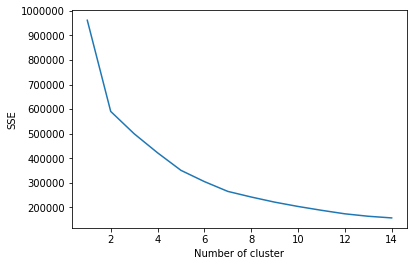

In [121]:
from sklearn.cluster import KMeans

# Se realizan 15 conglomerados y se grafica el error cuadrático
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, random_state=42, n_jobs=-1).fit(train)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

In [122]:
# Se escoge K = 7 para el número de conglomerados
# Se muestran las coordenadas de cada centroide de los 7 grupos
kmeans = KMeans(n_clusters=7, random_state=42, n_jobs=-1).fit(train)
cc = pd.DataFrame(kmeans.cluster_centers_)
cc.columns = ['Global_active_power','Global_reactive_power','Voltage','Global_intensity',
                'Sub_metering_1','Sub_metering_2','Sub_metering_3', 'Year', 'Month', 
              'Week', 'DayofWeek', 'Hour']
cc

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Year,Month,Week,DayofWeek,Hour
0,1.798329,0.115944,239.791616,7.502507,0.161560,0.849582,17.969359,2008.484680,3.353760,12.518106,2.799443,12.571031
1,0.575707,0.110026,242.206992,2.475578,0.028278,0.455013,0.344473,2008.334190,10.321337,43.740360,3.151671,9.352185
2,0.409464,0.136912,240.492434,1.835174,0.055215,0.519427,0.883436,2008.492843,6.742331,27.588957,2.981595,12.494888
3,4.153581,0.227839,237.546613,17.551613,37.129032,3.919355,10.677419,2008.274194,6.500000,26.483871,3.241935,15.822581
4,3.846632,0.199368,237.482632,16.384211,0.315789,35.842105,11.921053,2007.921053,7.078947,28.921053,3.763158,16.289474
5,1.875188,0.134973,239.718046,7.835249,0.337165,0.704981,18.065134,2008.287356,10.084291,42.310345,3.114943,11.946360
6,0.592004,0.103823,242.585942,2.529933,0.033259,0.658537,0.270510,2008.416851,2.771619,9.917960,3.050998,9.447894


# 2. Clustering por Método jerárquico

In [123]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=7, linkage='average').fit(train)

# 3. Clustering por DBSCAN

In [124]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

nbrs = NearestNeighbors(n_neighbors=7, algorithm='ball_tree').fit(train)

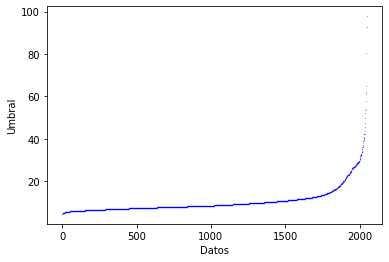

In [125]:
# Se realiza el gráfico para determinar los parametros del radio de la circunferencia (eps) y el umbral
distances, indices = nbrs.kneighbors(train)
distances = [np.linalg.norm(e) for e in distances]
distances.sort()

plt.figure()
plt.plot(distances, 'b.', markersize=0.3)
plt.xlabel("Datos")
plt.ylabel("Umbral")
plt.show()

In [126]:
distances[1500]

10.851322500045786

In [128]:
# Se escoge entonces eps (radio de la circunferencia) como distances[1500] y min_samples (umbral) como 7
dbscan = DBSCAN(eps=distances[1500], min_samples=7).fit(train)

## Comparación y análisis de las técnicas

In [129]:
aux_train = train.copy()

In [132]:
# Calcular la distancia entre dos vectores de coordenadas o registros
def proximidad(x, y):
    return np.linalg.norm(x-y)

# Calcular la cohesion entre todos los elementos de un conglomerado
def cohesion(Ci_list, dt):
    ans = 0
    for i in Ci_list:
        x = dt.iloc[i].to_numpy()
        for j in Ci_list:
            ans += proximidad(x, dt.iloc[j].to_numpy())
    return ans

# Calcular la separacion entre dos conglomerados
def separacion(Ci_list, Cj_list, dt):
    ans = 0
    for i in Ci_list:
        x = dt.iloc[i].to_numpy()
        for j in Cj_list:
            ans += proximidad(x, dt.iloc[j].to_numpy())
    return ans

In [133]:
# Calculamos cohesion y separacion para K-means
aux_train['labels'] = kmeans.labels_
aux = aux_train.groupby('labels')
ans1, ans2 = 0, 0

for k in range(7):
    Ci_list = aux.groups[k].to_numpy()
    ans1 += cohesion(Ci_list, data)
print("Cohesion:", ans1)
kmeans_coh = ans1

for k in range(7):
    Ci_list = aux.groups[k].to_numpy()
    for l in range(7):
        if k != l:
            Cj_list = aux.groups[l].to_numpy()
            ans2 += separacion(Ci_list, Cj_list, data)
print("Separacion:", ans2)
kmeans_sep = ans2

Cohesion: 10873021.243005335
Separacion: 105970991.90599936


In [134]:
# Calculamos cohesion y separacion para Método jerárquico
aux_train['labels'] = agglo.labels_
aux = aux_train.groupby('labels')
ans1, ans2 = 0, 0

for k in range(7):
    Ci_list = aux.groups[k].to_numpy()
    ans1 += cohesion(Ci_list, data)
print("Cohesion:", ans1)
jerarq_coh = ans1

for k in range(7):
    Ci_list = aux.groups[k].to_numpy()
    for l in range(7):
        if k!= l:
            Cj_list = aux.groups[l].to_numpy()
            ans2 += separacion(Ci_list, Cj_list, data)
print("Separacion:", ans2)
jerarq_sep = ans2

Cohesion: 94411591.70587394
Separacion: 22432421.443128563


In [ ]:
# Cantidad de conglomerados generada por DBSCAN (6, con indices 0..5)
max(dbscan.labels_)

In [141]:
# Calculamos cohesion y separacion para DBSCAN
aux_train['labels'] = dbscan.labels_
aux = aux_train.groupby('labels')
ans1, ans2 = 0, 0

for k in range(6):
    Ci_list = aux.groups[k].to_numpy()
    ans1 += cohesion(Ci_list, data)
print("Cohesion:", ans1)
dbscan_coh = ans1

for k in range(6):
    Ci_list = aux.groups[k].to_numpy()
    for l in range(6):
        if k!= l:
            Cj_list = aux.groups[l].to_numpy()
            ans2 += separacion(Ci_list, Cj_list, data)
print("Separacion:", ans2)
dbscan_sep = ans2

Cohesion: 92718755.41716066
Separacion: 7904087.41821493


In [146]:
# Qué método tuvo la mejor cohesión en cada conglomerado?
min(kmeans_coh, jerarq_coh, dbscan_coh)

10873021.243005335

In [147]:
# Qué método tuvo el mayor separación entre conglomerados?
max(kmeans_sep, jerarq_sep, dbscan_sep)

105970991.90599936

El modelo de K-means, por ser más eficiente computacionalmente, pudo haberse entrenado con el conjunto de datos completo (a diferencia del jerarquico que se desbordaba por memoria, y de que el DBSCAN sólo creara un sólo conglomerado). Pero, el hacer esto no hace justa la comparacion entre los tres métodos.

El método que tuvo mejor **cohesión** fue K-means, y el que tuvo mejor **separación**, también, fue el método de K-means. Obviamente se destaca el hecho de que no se está trabajando con el conjunto entero de datos, las métricas usadas no son del todo precisas y de que posiblemente otras métricas de desempeño pudieron ser usadas para comparar los tres métodos de tal forma que se pudiera apreciar mejor las fortalezas y debilidades de cáda uno.

Sin embargo, bajo las condiciones de poder cómputo en las que se desarrolló el taller y las métricas usadas, el método de conglomerados que mejor desempeño tuvo fue el de **K-means**, ya que este pudo formar grupos cuyos puntos estuvieran más cerca los unos a los otros (lo cual sugiere que pudo identificar los patrones de cada grupo en el conjunto de datos de forma correcta), y a su vez, estos grupos se encontraban más alejados o aislados entre sí que en cualquiera de los otros métodos.